In [1]:
import IPython.display as d
import tabulate
import json
from tracing.rl.actions import *
import os.path
from pretrain_dataset import *

In [2]:
dataset = '../../../resources/controls_popups_dataset.jsonl'
dataset_imgs_url = "https://drive.google.com/open?id=1whS0cYpJVIhbGRdRpjkWuyj2rFLW3iEQ"
download_dataset_imgs_if_need(dataset_imgs_url)

{'url': 'docssmokeshop.com', 'type': 'select', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/56750cca-6ecd-4bcc-9cd7-4cb4de32fd42.png', 'height': 36, 'width': 70}


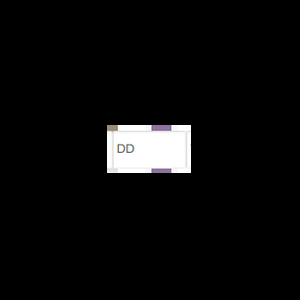

{'url': 'smokesmartllc.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/1a59f18b-2bf7-4dfd-83c2-8e4770ac6580.png', 'height': 38, 'width': 60}


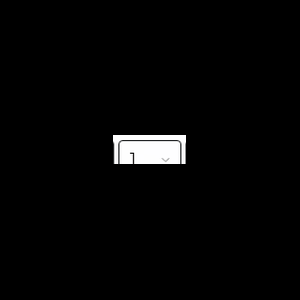

{'url': 'axisvapor.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/fb696aee-2c15-4260-a3e5-136c36596bda.png', 'height': 52, 'width': 90}


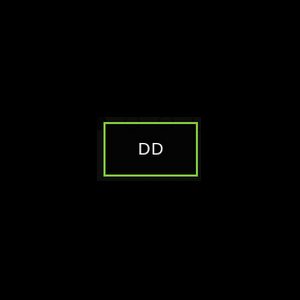

{'url': 'euphoriavaporoutlet.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/01d27019-4685-41dd-98bc-1c1dc58eeb80.png', 'height': 36, 'width': 426}


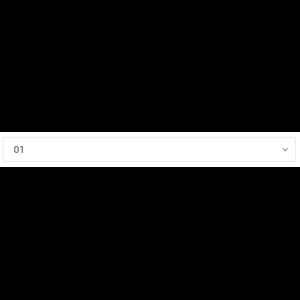

{'url': 'skycastlevape.com', 'type': 'select', 'label': 'Day', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/76b83544-7642-43e5-9f17-4985909d4cb0.png', 'height': 50, 'width': 85}


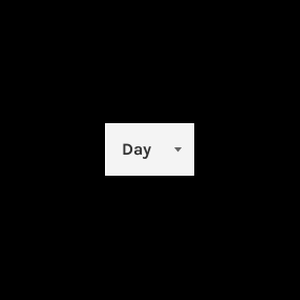

{'url': 'wabisabivapor.com', 'type': 'select', 'label': '- Day -', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/e7f50c96-e8cf-4443-a4d6-3bb6745e399c.png', 'height': 49, 'width': 87}


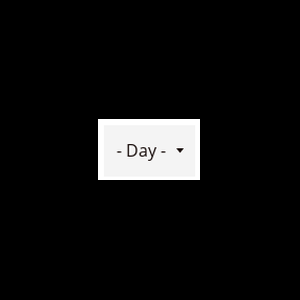

{'url': 'goldenstatevapor.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/b410acf3-0656-4270-b17b-b783d36ff38a.png', 'height': 46, 'width': 90}


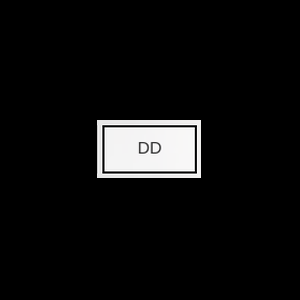

{'url': 'wholesalevapor.co', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/95e40c90-5253-46d7-859d-c32108b9d3d2.png', 'height': 63, 'width': 107}


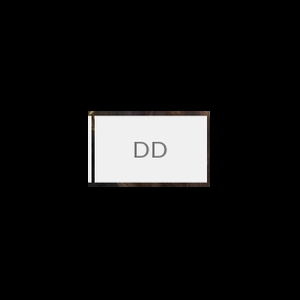

{'url': 'enhancedecigs.com', 'type': 'select', 'label': '11', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/e880fa92-98e0-483f-9cc0-a6e6f6a2709d.png', 'height': 34, 'width': 114}


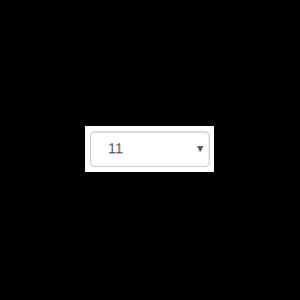

{'url': 'vapordab.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/99221e3b-4bc9-4d72-872e-7073d2552530.png', 'height': 52, 'width': 90}


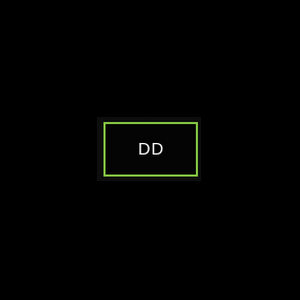

{'url': 'mailboxvapes.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/4a6d9310-f42b-4b44-8e99-1349b7ed0ca9.png', 'height': 52, 'width': 90}


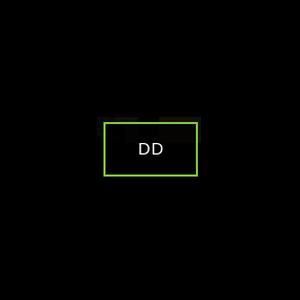

{'url': 'bigchiefvapors.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/997d46df-b651-481d-9dab-42db0acd12e6.png', 'height': 52, 'width': 90}


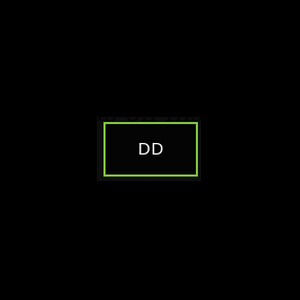

{'url': 'betamorphecigs.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/1f4c905f-af0f-4eb4-829a-a1a88153d9c4.png', 'height': 33, 'width': 47}


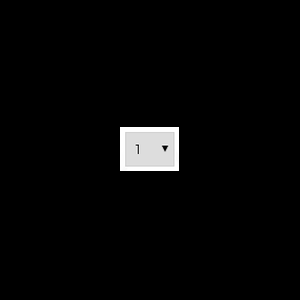

{'url': 'aquasmoke.net', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/b213c946-fb3c-4190-ae00-c7e680770ab5.png', 'height': 53, 'width': 90}


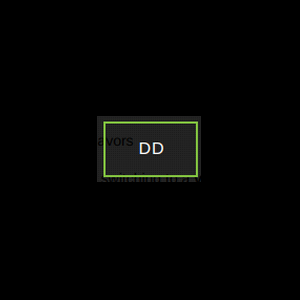

{'url': 'urgesmokeshop.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/679bdf1b-2e2d-4ff9-ab97-cec4ad7a8dc5.png', 'height': 17, 'width': 38}


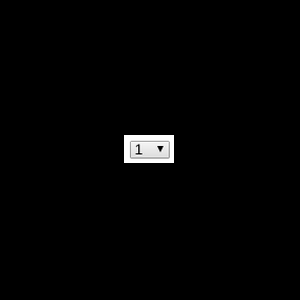

{'url': 'lifesaver-vapors.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/a285b732-d24c-4f77-911a-f3377f572d79.png', 'height': 52, 'width': 90}


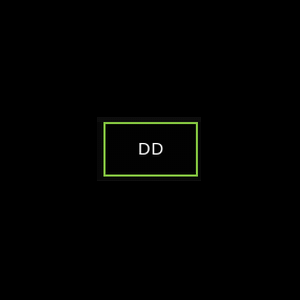

{'url': 'lakeshorevapors.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/3ead5c52-9b12-4d32-acf9-7f77218be6b9.png', 'height': 39, 'width': 58}


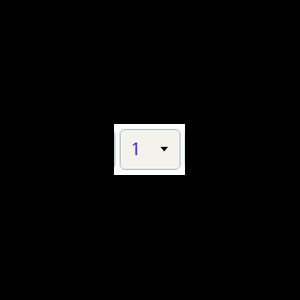

{'url': 'cigarpimp.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/8c291ca2-4121-44e5-acea-f40b1ff4eef4.png', 'height': 19, 'width': 40}


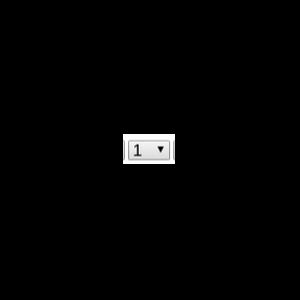

{'url': 'worldsfinestvapeshop.com', 'type': 'text', 'label': 'DD\nDay', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/e783a7a6-bed5-47a1-8fca-34e45a9ffbab.png', 'height': 45, 'width': 80}


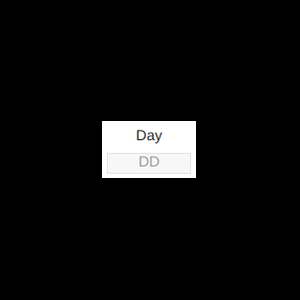

{'url': 'cravingvapor.com', 'type': 'select', 'label': 'Day', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/12b31540-195f-467f-915c-c840370666a8.png', 'height': 55, 'width': 220}


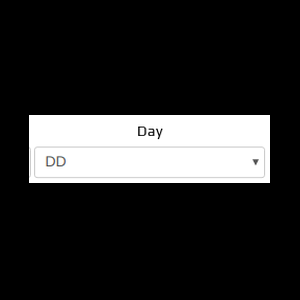

{'url': 'vaporifics.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/d11ea54c-7ef2-493f-a3bd-3f3dc2067fd2.png', 'height': 53, 'width': 90}


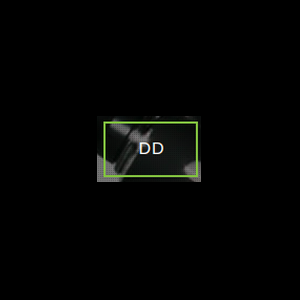

{'url': 'the-vape-place.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/9df1e5d8-798b-4bda-9918-a840f9fc14b6.png', 'height': 40, 'width': 58}


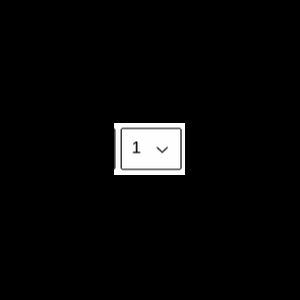

{'url': 'victoriousvapors.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/fe9ff041-1d43-43e4-9c67-9219354ee0ee.png', 'height': 53, 'width': 90}


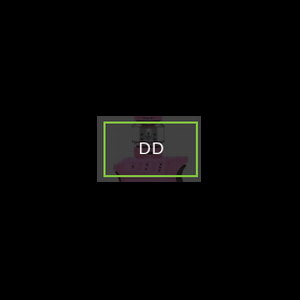

{'url': 'dreamvapor.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/639c164e-8b64-4006-9562-ea0dd2efac5b.png', 'height': 52, 'width': 90}


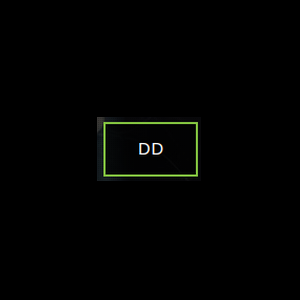

{'url': 'victoriousvapors.com', 'type': 'text', 'label': 'YYYY', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/8302212e-2701-467d-bbff-4664540af407.png', 'height': 53, 'width': 90}


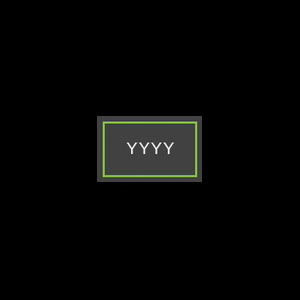

{'url': 'vapingsisters.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/fa0e80c9-dada-4df6-9af2-79e61668b8f6.png', 'height': 53, 'width': 90}


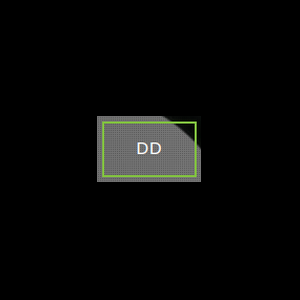

{'url': 'venumvapur.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/fa6468e7-c4f8-49b5-bc30-365389d84ddf.png', 'height': 52, 'width': 90}


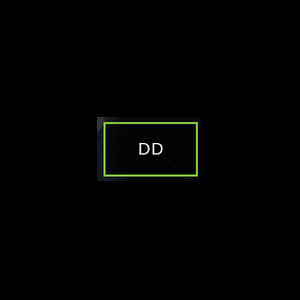

{'url': 'strongislandvapes.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/8c5299b7-1915-4e95-96b8-8c9716d9beb6.png', 'height': 40, 'width': 58}


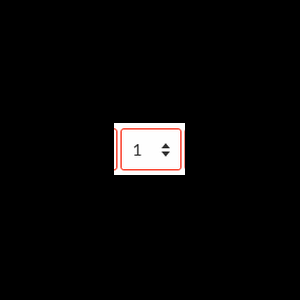

{'url': 'stogiesvapor.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/d5cb9b7a-4943-4920-9701-68f26a468905.png', 'height': 53, 'width': 90}


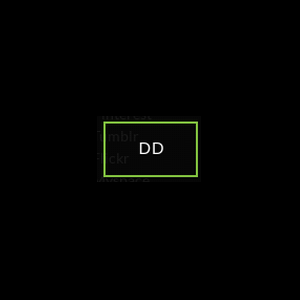

{'url': 'soulvaporejuice.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/1023f05d-bb58-449f-91e7-cba098378744.png', 'height': 52, 'width': 90}


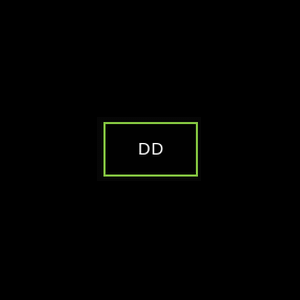

{'url': 'e-vaperz.com', 'type': 'text', 'label': '', 'possible_actions': [1, 1, 1, 0, 1], 'code': None, 'tooltip': None, 'img_file': 'imgs/61d306fe-0165-4184-b079-e179127d83a4.png', 'height': 38, 'width': 231}


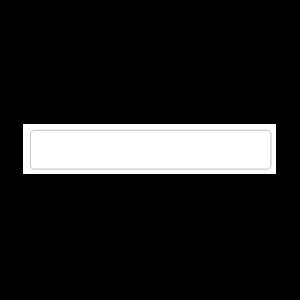

{'url': 'vapersandpapers.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/a8a99f4c-f583-45ae-92d4-687c24ec4541.png', 'height': 40, 'width': 360}


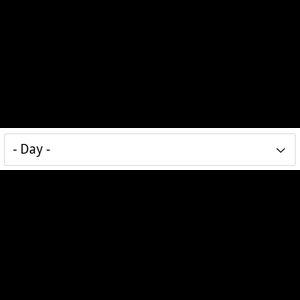

{'url': 'wholesalevapepro.com', 'type': 'select', 'label': 'Day', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/bf0ec98c-cbec-434b-914b-a04dba86e201.png', 'height': 40, 'width': 85}


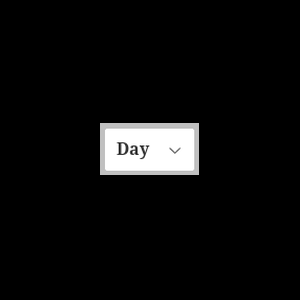

{'url': 'cityvaporandecig.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/6784ec36-0928-4495-ba2b-327d4ec9190d.png', 'height': 52, 'width': 90}


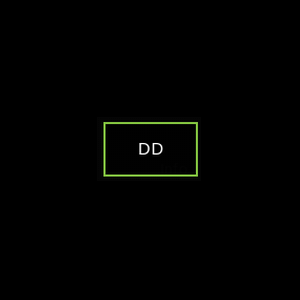

{'url': 'vaporiaworld.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/57bed21a-f965-4537-b6da-d1a6128f2c20.png', 'height': 52, 'width': 90}


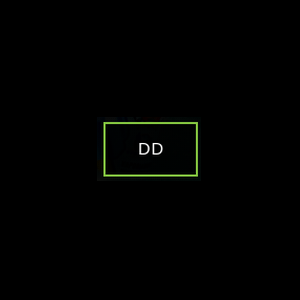

{'url': 'juicityvapor.com', 'type': 'select', 'label': 'Day', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/fa748b4e-425a-49b4-ae9e-e7c12e59490b.png', 'height': 45, 'width': 100}


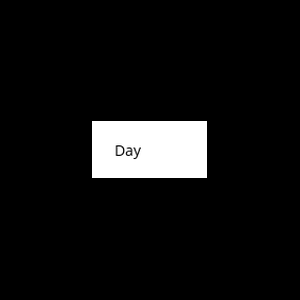

{'url': 'cuencacigars.com', 'type': 'text', 'label': 'Date of Birth mm/dd/yy', 'possible_actions': [1, 1, 1, 0, 1], 'code': None, 'tooltip': None, 'img_file': 'imgs/b58fc07b-d08e-440c-817a-da75143f0f45.png', 'height': 38, 'width': 398}


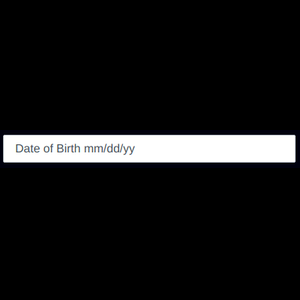

{'url': 'wordupecig.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/210719c5-4674-473f-a8b7-4cda164aa3b4.png', 'height': 53, 'width': 92}


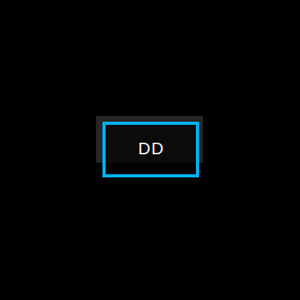

{'url': 'pipesforsmoking.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/ce397712-3fc7-48f7-b39a-87ff6a03052d.png', 'height': 52, 'width': 90}


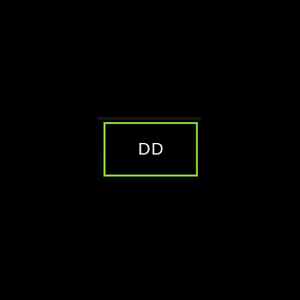

{'url': 'inkedupvapor.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/69bb033d-72e1-4628-a38f-d492fac351ad.png', 'height': 52, 'width': 90}


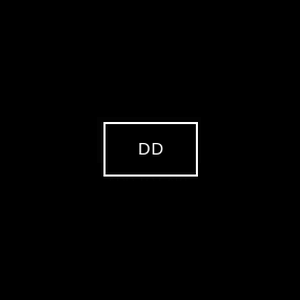

{'url': 'realvaporinc.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/4b82f538-601a-49af-9eaa-000de8f48c79.png', 'height': 52, 'width': 90}


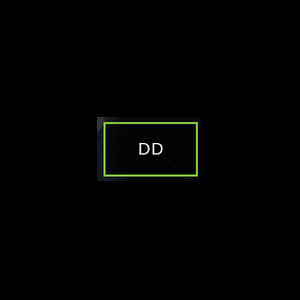

{'url': 'ivapeinc.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/237f0d97-fa5d-46c8-b51c-646705aca7bc.png', 'height': 53, 'width': 90}


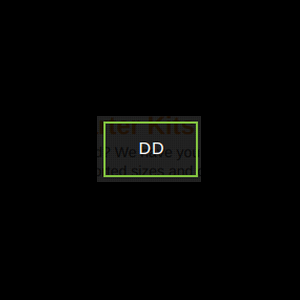

{'url': 'vaporwizard.net', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/170fc7e7-22a4-401d-a0eb-1260b1e8932e.png', 'height': 52, 'width': 90}


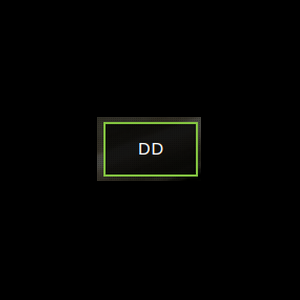

{'url': 'vapegasmic.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/aa6b8106-d018-422f-8c32-a866bb8e6e36.png', 'height': 53, 'width': 70}


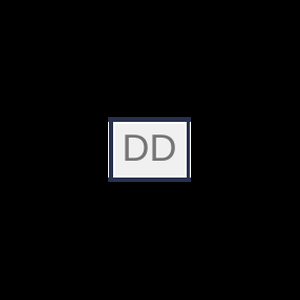

{'url': 'resurrectionvapor.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/92f1f0d5-685e-464f-9a4e-7d5956507eb7.png', 'height': 38, 'width': 140}


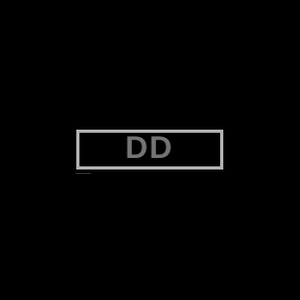

{'url': 'mnpvape.com', 'type': 'select', 'label': 'Day', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/b58dd072-3123-4175-9706-d4d71f0b9c7c.png', 'height': 40, 'width': 86}


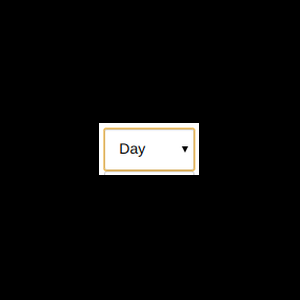

{'url': 'rev-vaping.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/c76245dd-f6f7-4a42-a695-1cf1885eb5e5.png', 'height': 63, 'width': 107}


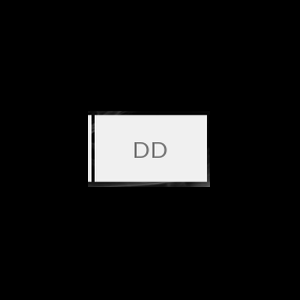

{'url': 'bestcigarvalues.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/9317a1bd-21ca-4b89-b1dd-30387fa73d9d.png', 'height': 40, 'width': 58}


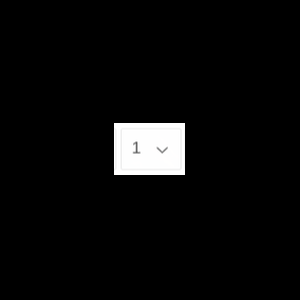

{'url': 'stachevape.com', 'type': 'select', 'label': '- Day -', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/0d6b1d5b-32e8-4fff-b61c-d72ba6a74404.png', 'height': 23, 'width': 65}


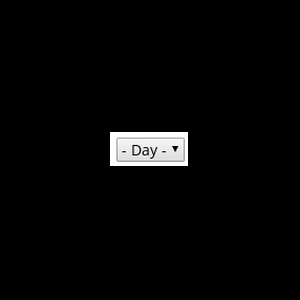

{'url': 'medivapharma.co.uk', 'type': 'text', 'label': '', 'possible_actions': [1, 1, 1, 0, 1], 'code': None, 'tooltip': None, 'img_file': 'imgs/1ef31560-cc48-4fba-a73b-5a056fa828d2.png', 'height': 50, 'width': 370}


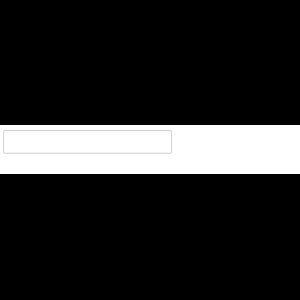

{'url': 'levelvape.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/495e2027-aaa0-4f4c-b957-0ebc181fdd35.png', 'height': 30, 'width': 90}


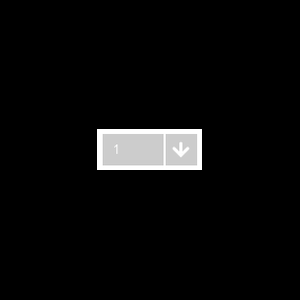

{'url': 'highbrowvapor.com', 'type': 'select', 'label': 'Day', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/48d17881-1358-4235-b3ed-1c7d096d0624.png', 'height': 45, 'width': 100}


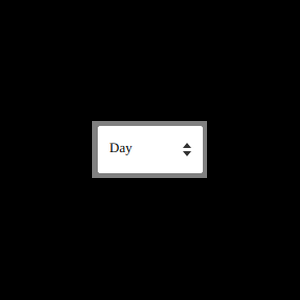

{'url': 'blazzinvapes.com', 'type': 'select', 'label': 'Day', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/ae9b6cd5-8289-4390-b067-b8420a2e05e9.png', 'height': 37, 'width': 111}


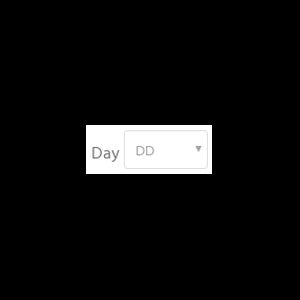

{'url': 'purevapeindy.com', 'type': 'select', 'label': '01\nDay:', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/cfa42af0-407f-4bf8-9c3f-86cc03c0fd35.png', 'height': 19, 'width': 77}


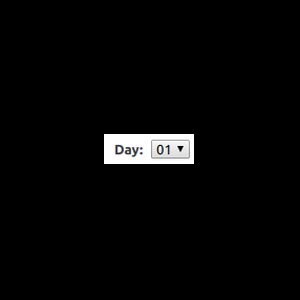

{'url': 'tallyhovaportonic.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/9d04d007-50e2-4c8f-b8a6-d43e72e6ef3f.png', 'height': 22, 'width': 40}


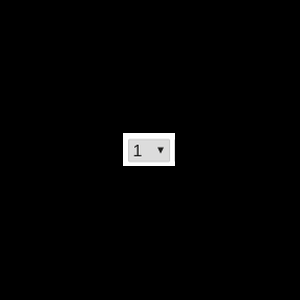

{'url': 'cultivatedvapor.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/dcab4f1e-feda-4ae0-922c-1503d7036018.png', 'height': 40, 'width': 38}


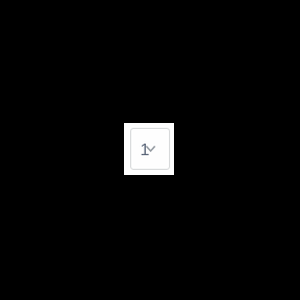

{'url': 'vapejp.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/3e4fd13a-be1b-46ca-8d05-2c336dde339b.png', 'height': 53, 'width': 90}


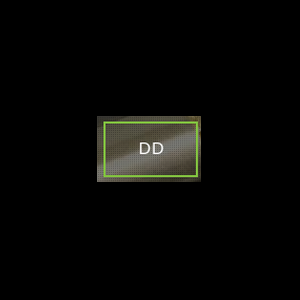

{'url': 'madscientistvapor.com', 'type': 'text', 'label': '####', 'possible_actions': [1, 1, 1, 0, 1], 'code': None, 'tooltip': None, 'img_file': 'imgs/e12fdef1-2d87-42bf-b8f8-e046fe7c6862.png', 'height': 62, 'width': 67}


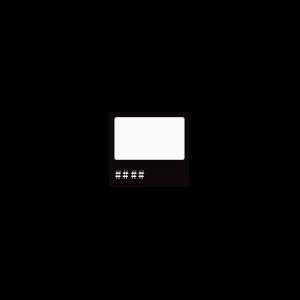

{'url': 'vicevaporlounge.com', 'type': 'select', 'label': '- Day -', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/6a7d67ea-a5e9-44f1-8775-84dc38df6980.png', 'height': 40, 'width': 82}


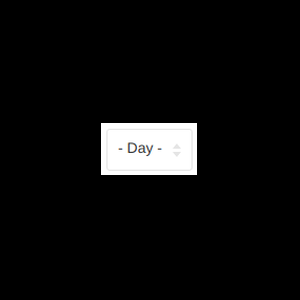

{'url': 'madscientistvapor.com', 'type': 'text', 'label': 'Subject *', 'possible_actions': [1, 1, 1, 0, 1], 'code': None, 'tooltip': None, 'img_file': 'imgs/ef7ca69f-eb0a-42c6-ab3d-8a8527e55d88.png', 'height': 64, 'width': 663}


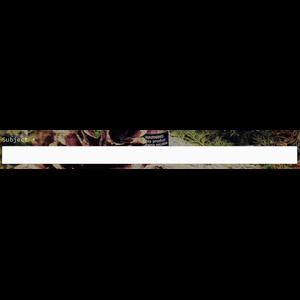

{'url': 'kbvapors.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/9779e0ae-3de7-4913-b6cd-ddb65999f7b3.png', 'height': 44, 'width': 88}


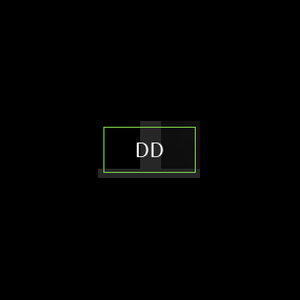

{'url': 'sugoivapor.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/f567b981-ac7a-49ed-8f51-5525de294d17.png', 'height': 23, 'width': 40}


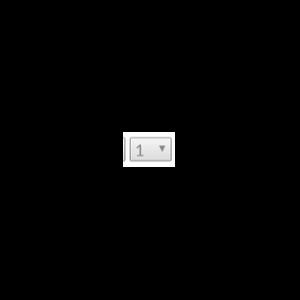

{'url': 'rarecandyvapeco.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/002486ca-9f8a-42f4-8ec9-9d2bb595f70b.png', 'height': 52, 'width': 90}


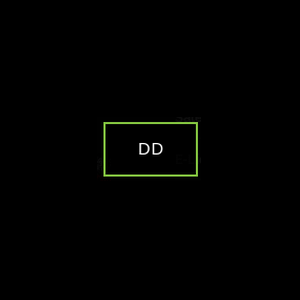

{'url': 'vaperanger.co.uk', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/324baa35-3745-4f14-809a-9aa8533f5cbb.png', 'height': 36, 'width': 60}


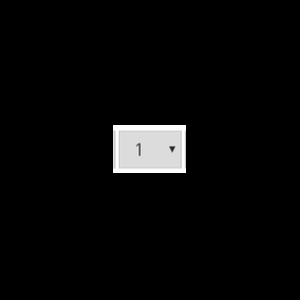

{'url': 'boondockvapes.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/786167df-7cd0-408b-a7ca-ddccc0f6ba29.png', 'height': 16, 'width': 37}


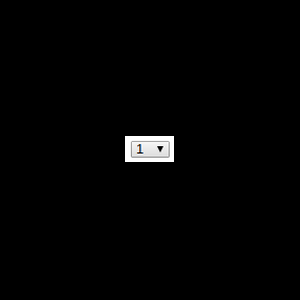

{'url': 'maddcraftvapors.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/0062de32-5712-4f76-9fe6-2309c6d60542.png', 'height': 53, 'width': 90}


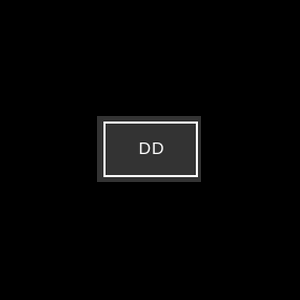

{'url': 'vaporsupply.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/c40ed617-7c09-4440-9a4e-ef7998329f5a.png', 'height': 32, 'width': 97}


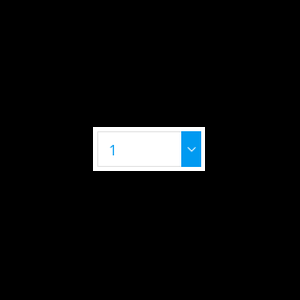

{'url': 'captivape.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/8f869072-d936-47e1-8800-972dfbdd972a.png', 'height': 33, 'width': 47}


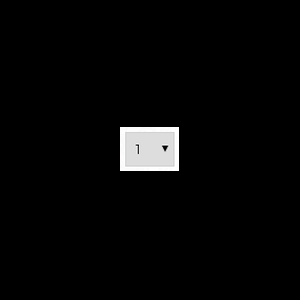

{'url': 'vypevapor.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/9e509797-1902-469e-a1e5-536d27f31ac0.png', 'height': 17, 'width': 38}


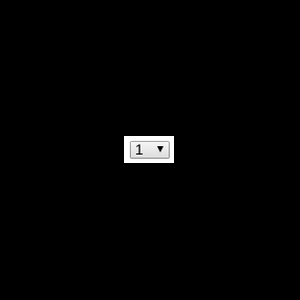

{'url': 'vapor-boss-inc.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/bc235d12-277d-498a-acaf-fa11fab5dfae.png', 'height': 18, 'width': 68}


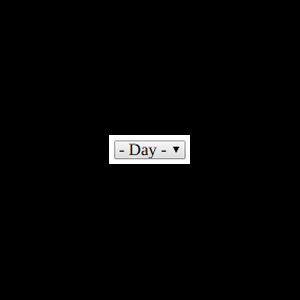

{'url': 'indianrivertobacco.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/1abe271f-3e59-427b-8681-f8cbd7108451.png', 'height': 61, 'width': 61}


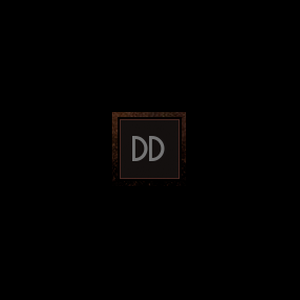

{'url': 'magiccitycigar.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/c5666e04-aa72-4f94-95ce-d9a8276e804c.png', 'height': 53, 'width': 90}


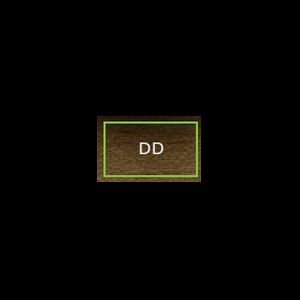

{'url': 'dragonsdenvapor.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/79352fc0-a587-4501-ab40-8f06c2f966d0.png', 'height': 53, 'width': 90}


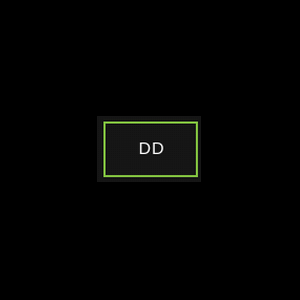

{'url': 'steamvapourco.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/5622fd93-1ac6-4d72-806a-2d33d2c52c07.png', 'height': 34, 'width': 43}


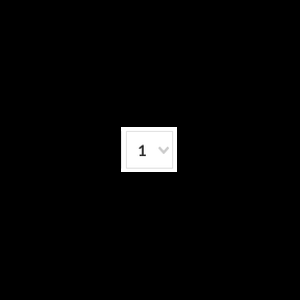

{'url': 'purevapenow.com', 'type': 'text', 'label': 'Day', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/c8cdd017-7961-437a-a00e-f929ee968c69.png', 'height': 20, 'width': 64}


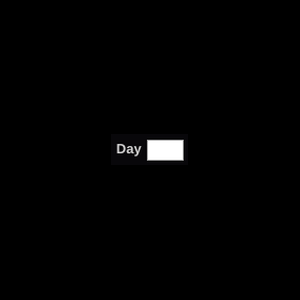

{'url': 'sutliff-tobacco.com', 'type': 'text', 'label': 'Month:', 'possible_actions': [1, 1, 1, 0, 1], 'code': None, 'tooltip': None, 'img_file': 'imgs/4b26b36b-a7c8-4e68-8915-30173280359c.png', 'height': 50, 'width': 74}


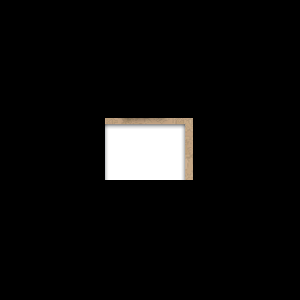

{'url': 'sutliff-tobacco.com', 'type': 'text', 'label': 'Day:', 'possible_actions': [1, 1, 1, 0, 1], 'code': None, 'tooltip': None, 'img_file': 'imgs/525deceb-cbcc-4706-b1fe-6474a8c2783d.png', 'height': 50, 'width': 74}


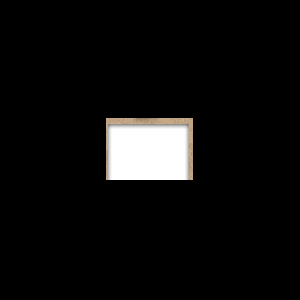

{'url': 'sutliff-tobacco.com', 'type': 'text', 'label': 'Year:', 'possible_actions': [1, 1, 1, 0, 1], 'code': None, 'tooltip': None, 'img_file': 'imgs/ee9d3a01-1fcf-4fef-9c2d-09dc2fbe5c61.png', 'height': 50, 'width': 74}


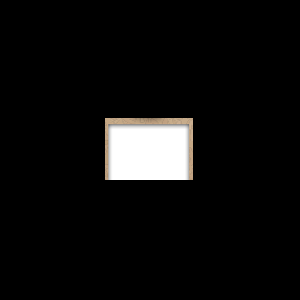

{'url': 'garciastobaccoshop.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/35daa840-b505-4089-a30b-f54e24436665.png', 'height': 17, 'width': 37}


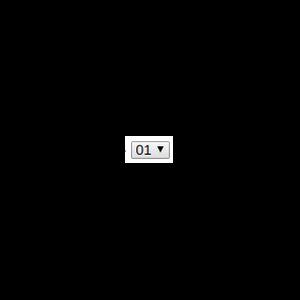

{'url': 'eliminatorvapes.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/b29f3968-6620-465d-aaad-1952347c6b50.png', 'height': 29, 'width': 100}


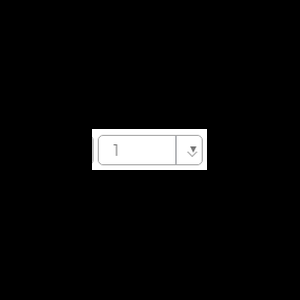

{'url': 'wyomingvapor.com', 'type': 'text', 'label': 'Day', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/ef0cb2b9-95a7-4506-9e0a-6a206205272d.png', 'height': 21, 'width': 64}


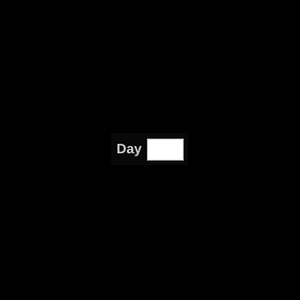

{'url': 'infinityvapes.net', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/8fe5b95c-3f74-4d62-9764-5a3312429557.png', 'height': 20, 'width': 90}


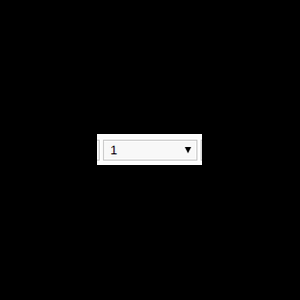

{'url': 'gavaporcompany.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/dee87e40-f713-40cb-945b-cc610d2d2962.png', 'height': 38, 'width': 58}


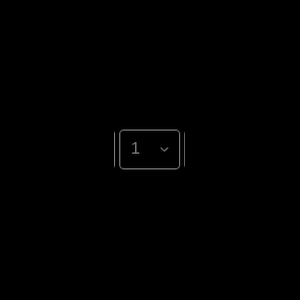

{'url': 'vapenjays.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/c1556222-bac7-486f-a3ec-099b18d4f262.png', 'height': 53, 'width': 90}


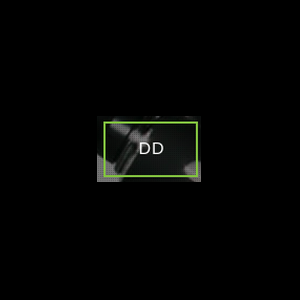

{'url': 'onehourvapedelivery.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/d8d14079-2318-4e54-b8ad-fbbd6ab7896b.png', 'height': 52, 'width': 90}


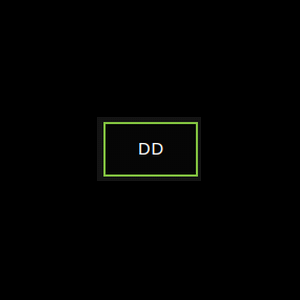

{'url': 'marcosvapor.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/be2b8de6-603e-4065-a877-b9dc5b0abc68.png', 'height': 44, 'width': 88}


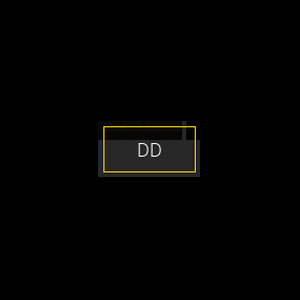

{'url': 'gostvapor.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/67677269-3d88-4221-b8c3-7ebc3afd9420.png', 'height': 28, 'width': 50}


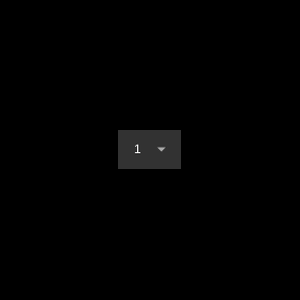

{'url': 'nashvillevapor.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/d869578b-d062-4d60-84db-42a83e6c4073.png', 'height': 63, 'width': 107}


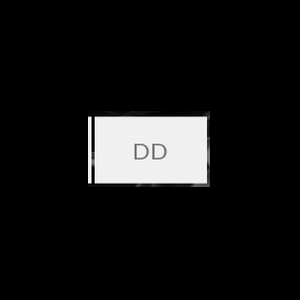

{'url': 'foghousevapeco.com', 'type': 'select', 'label': '- Day -', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/228f3604-c24a-40c1-9553-c2f86bdab326.png', 'height': 45, 'width': 83}


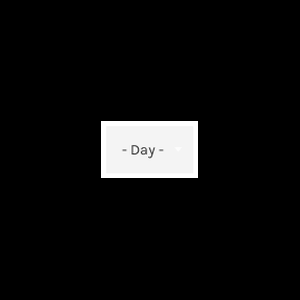

{'url': 'phoenixvaporcafe.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/b10efb9f-71f5-42ef-81a4-b9ffcb9dc351.png', 'height': 33, 'width': 70}


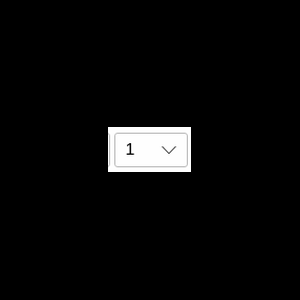

{'url': 'vapekult.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/00016cd8-c562-4847-9650-e45fd1db6518.png', 'height': 34, 'width': 43}


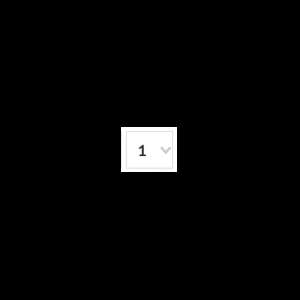

{'url': 'cigarboxpa.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/c52e5427-7b87-4969-a159-2b70f036515c.png', 'height': 20, 'width': 90}


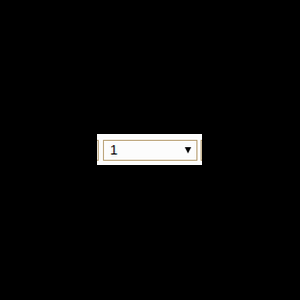

{'url': 'guardian-angel-vapor-company.myshopify.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/83ecc6d6-0a30-4ddb-b315-c4553bd2669a.png', 'height': 38, 'width': 58}


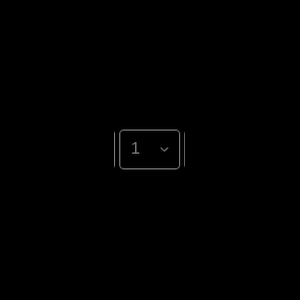

{'url': 'smalltownvapes.com', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/bb1bf68a-d722-42b0-b974-a6e03db0a5cf.png', 'height': 18, 'width': 39}


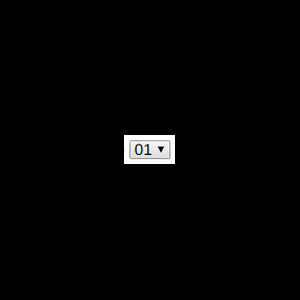

{'url': 'govapors.biz', 'type': 'select', 'label': '1', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/c1f62e96-1e02-4d92-8ff0-c480c9248462.png', 'height': 33, 'width': 36}


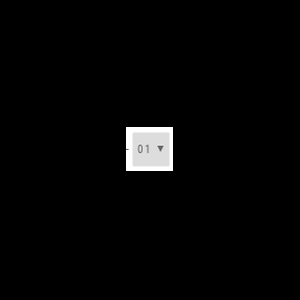

{'url': 'westsidevapor.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/ef6709c7-1eb4-497b-8e9e-45af9b8e3696.png', 'height': 53, 'width': 90}


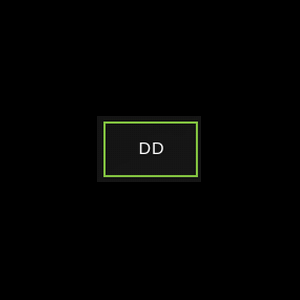

{'url': 'thecloudvaporlounge.com', 'type': 'select', 'label': '- Day -', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/45fe9f0f-731d-4566-9bc6-41b3d0c80a8b.png', 'height': 27, 'width': 61}


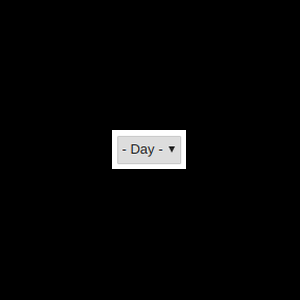

{'url': 'bellasvapes.com', 'type': 'select', 'label': '- Day -', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/c373f40a-bb32-460e-915e-d6611df90148.png', 'height': 48, 'width': 91}


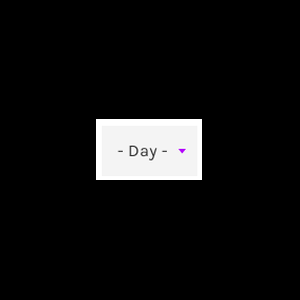

{'url': 'purecbdvapors.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/a162d292-7bf2-4012-8af0-3d844302b665.png', 'height': 53, 'width': 92}


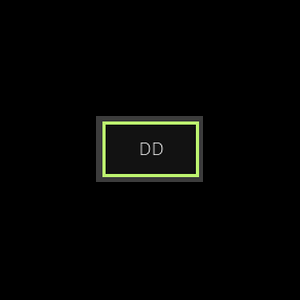

{'url': 'talonvapor.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/e48452fd-7826-4a74-aba8-56e59feaad86.png', 'height': 52, 'width': 90}


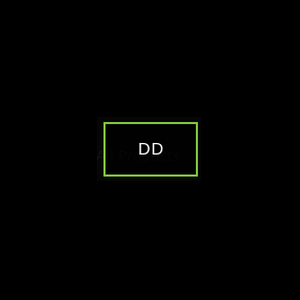

{'url': 'bigfishvaporlab.com', 'type': 'text', 'label': 'DD', 'possible_actions': [1, 0, 0, 0, 0], 'code': None, 'tooltip': None, 'img_file': 'imgs/0b3eebdb-7841-4768-b13a-0a930064a3dd.png', 'height': 52, 'width': 90}


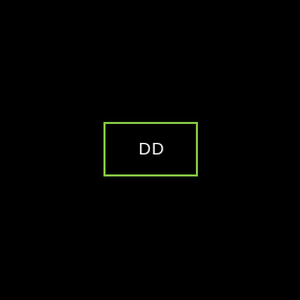

In [5]:
max_to_show = 100

cnt = 0

ctrl_id = 0 # Show Years
with open(dataset) as f:
    for line in f:
            
        info = json.loads(line)
        file = info['img_file']
        pa = info['possible_actions']
        if pa[ctrl_id] == 0:
            continue
        
        print(info)
        if os.path.isfile(file):
            d.display(d.Image(filename=file))
            
        cnt += 1
        if cnt > max_to_show:
            break
        

In [ ]:
actions_stat = {}
actions_pair = {}

with open(dataset) as f:
    for line in f:
        info = json.loads(line)
        pa = info["possible_actions"]
        for action_id, is_possible in enumerate(pa):
            if is_possible == 1:
                actions_stat[action_id] = actions_stat.get(action_id, 0) + 1
        
        for i in range(len(pa)):
            for j in range(len(pa)):
                if pa[i] != 1 or pa[j] != 1:
                    continue
                
                actions_pair[(i, j)] = actions_pair.get((i, j), 0) + 1
    
stat_table = []
print("Possible actions statistics:")
for action_id, action in enumerate(Actions.actions):
    cnt = actions_stat.get(action_id, 0)
    stat_table.append([str(action), cnt])

d.display(d.HTML(tabulate.tabulate(stat_table, tablefmt='html')))


print('\n\nPairs of actions')
pairs_table = []
pairs_table.append([' '] + Actions.actions)

for action_id, action in enumerate(Actions.actions):
    pairs_table.append([str(action)])
    
    for action_id_2, _ in enumerate(Actions.actions):
        cnt = actions_pair.get((action_id, action_id_2), 0)
        pairs_table[action_id + 1].append(cnt)
        
d.display(d.HTML(tabulate.tabulate(pairs_table, tablefmt='html')))
